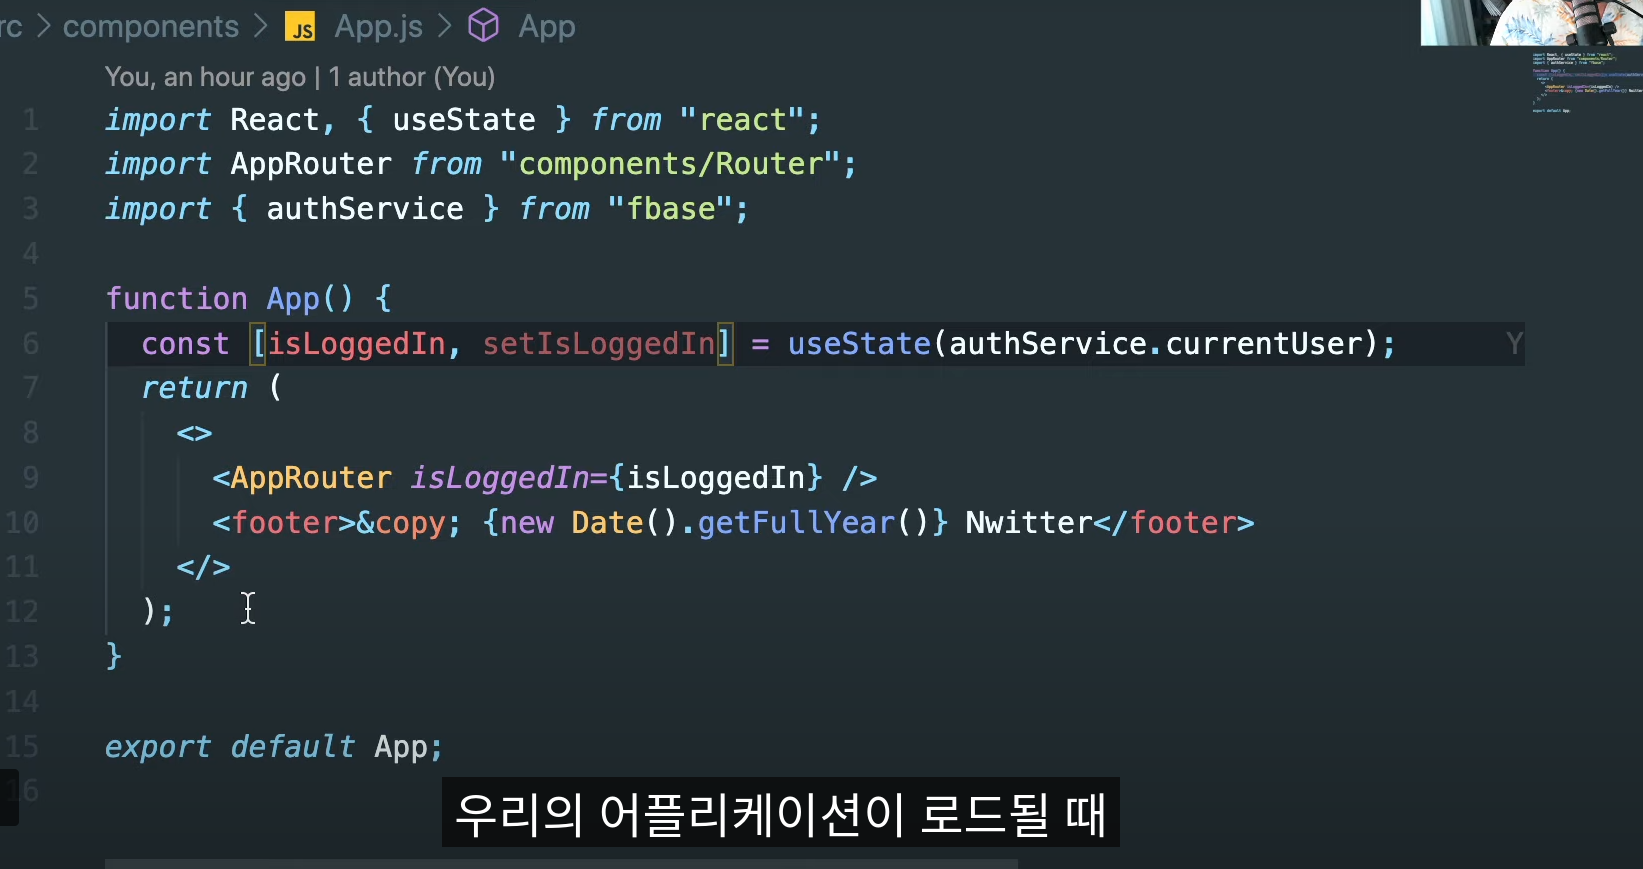

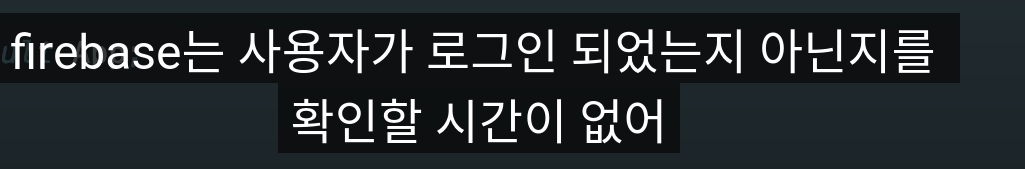

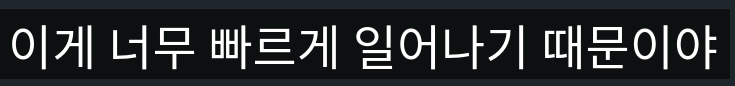

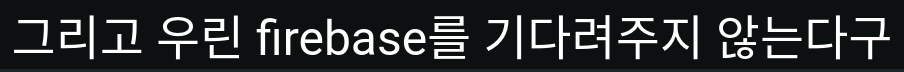

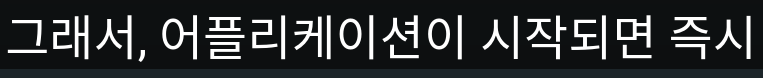

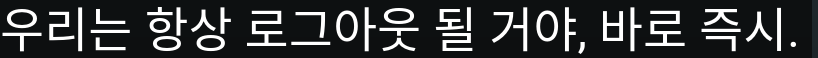

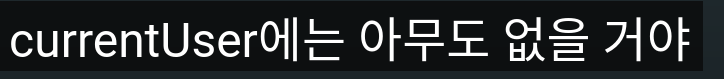

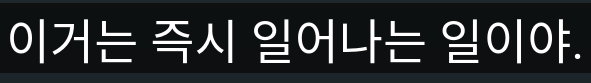

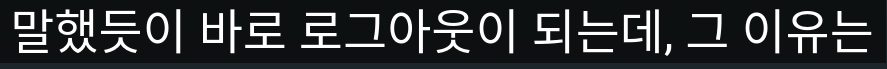

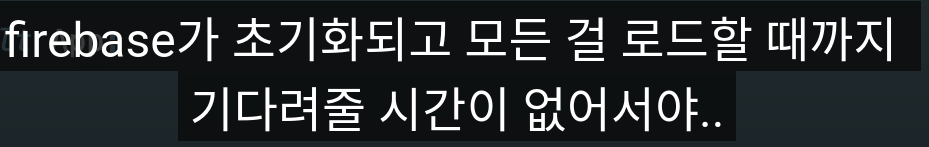

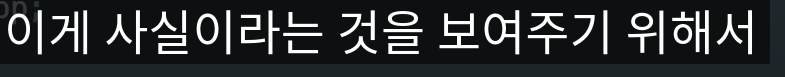

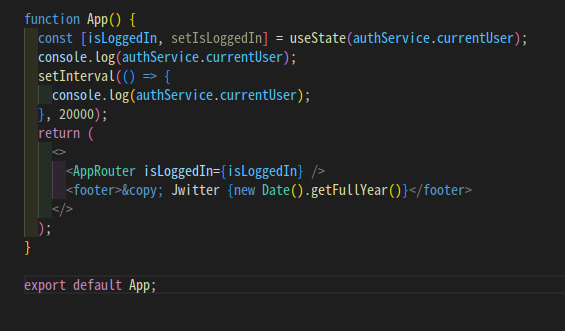

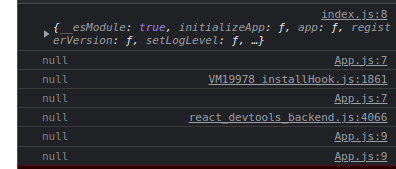

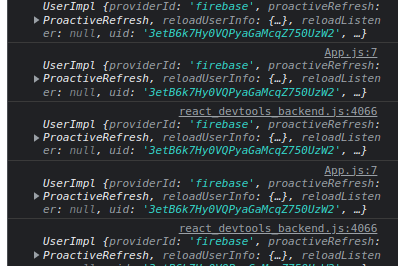

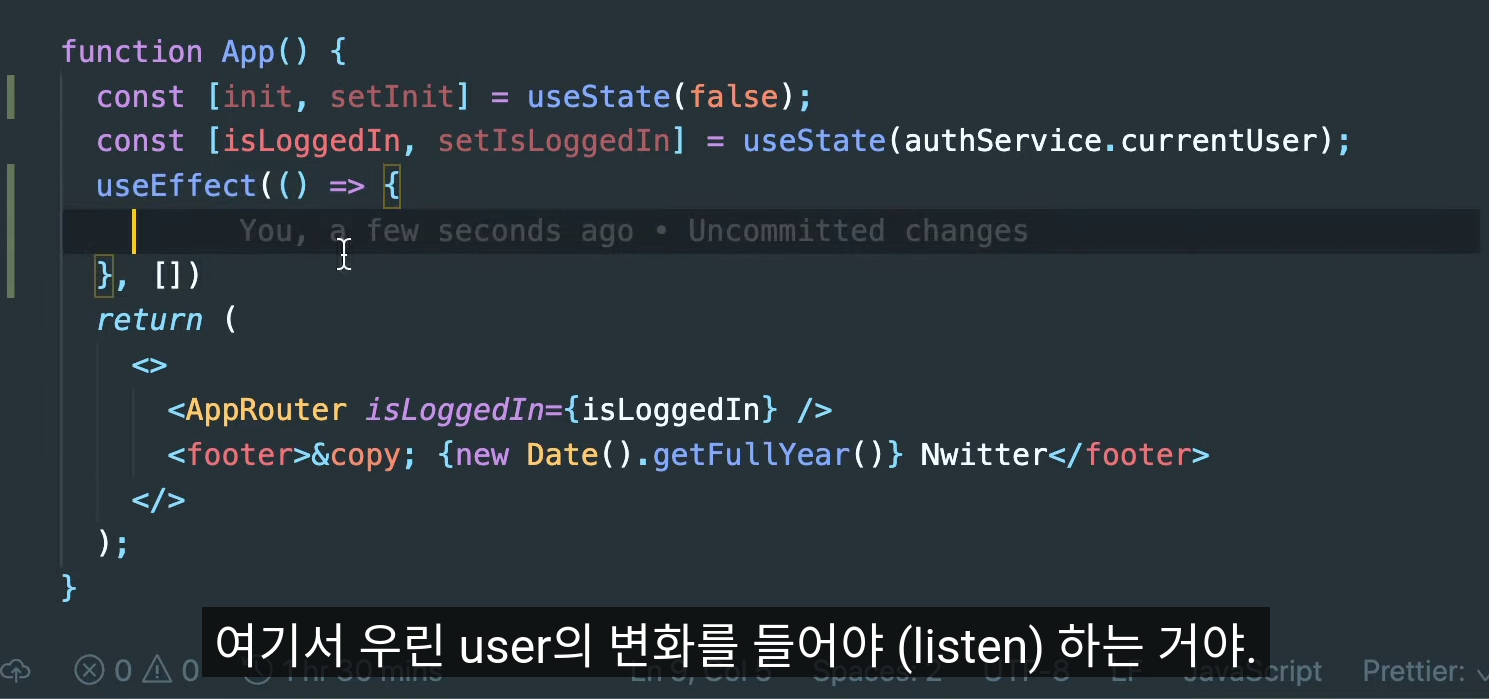

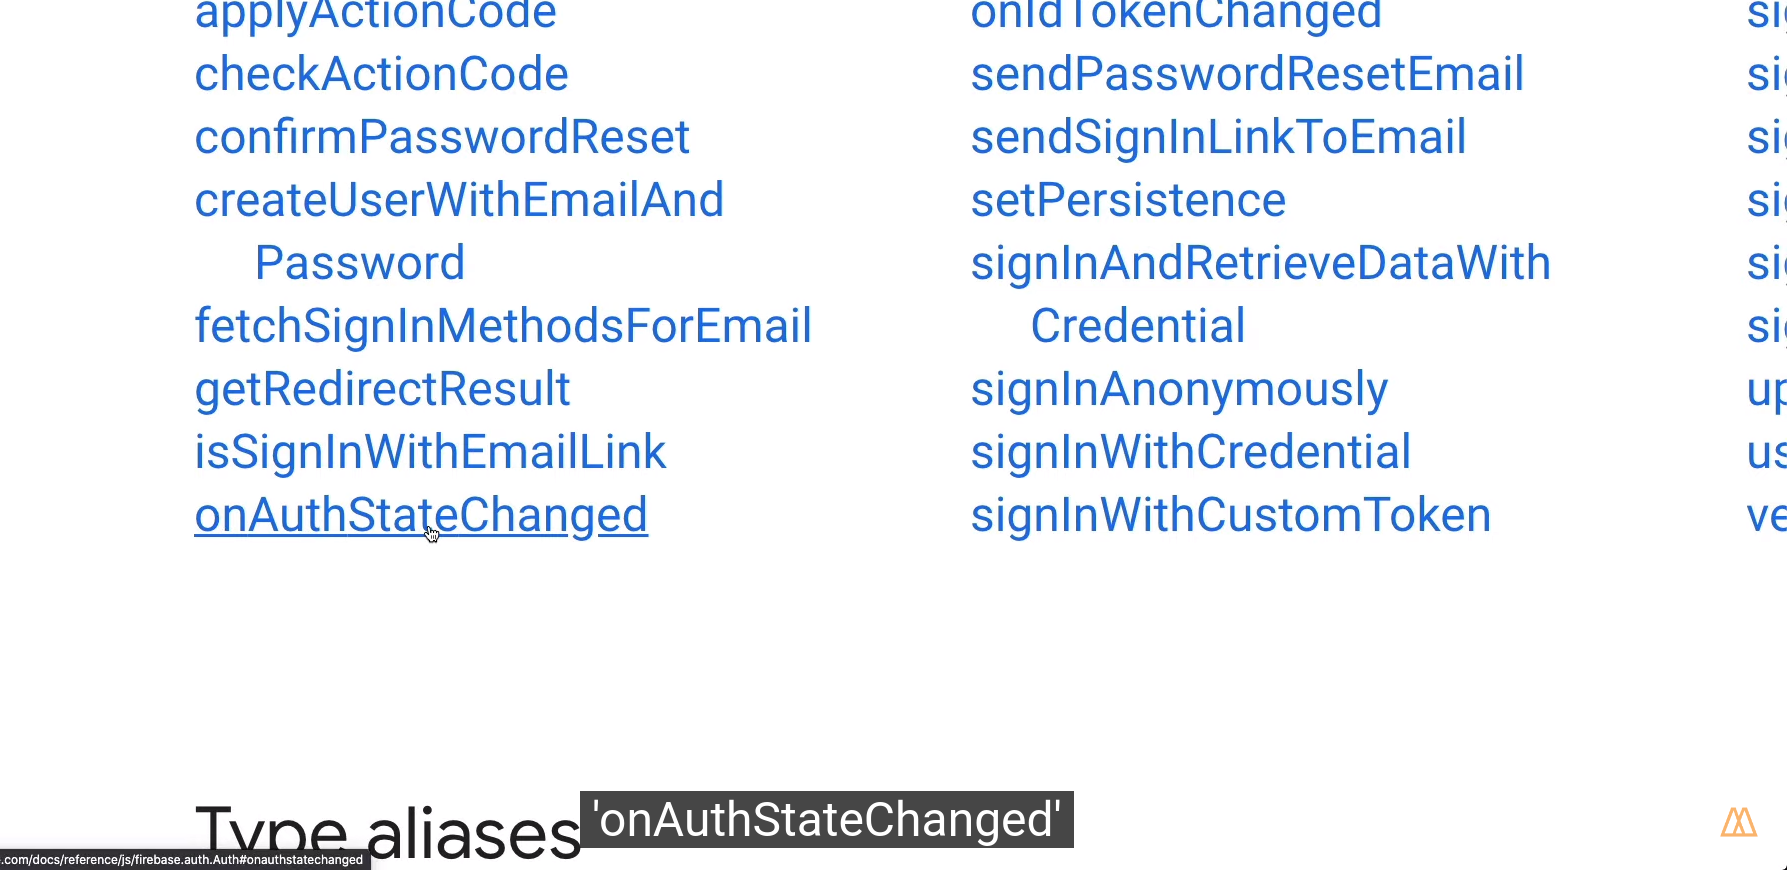

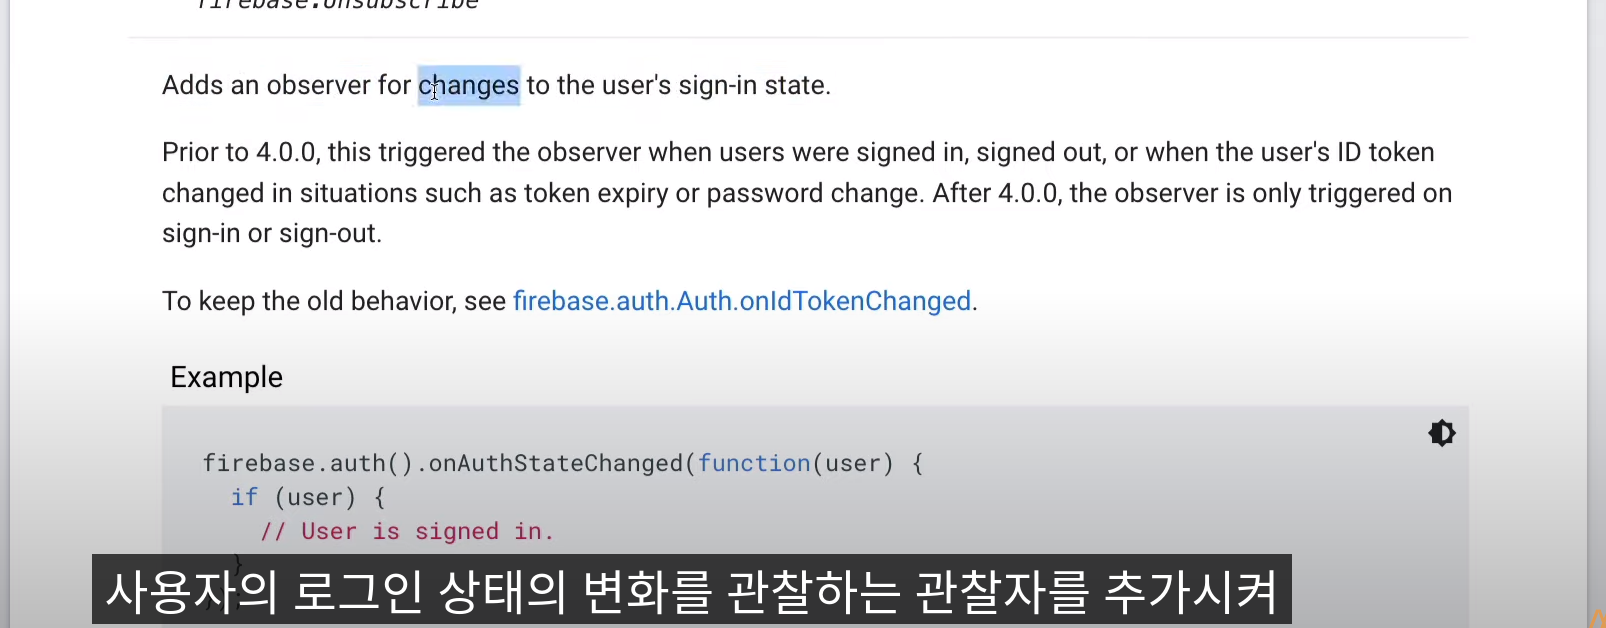

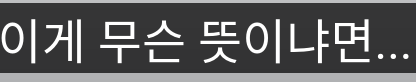

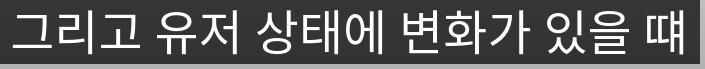

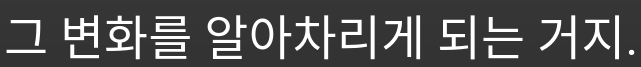

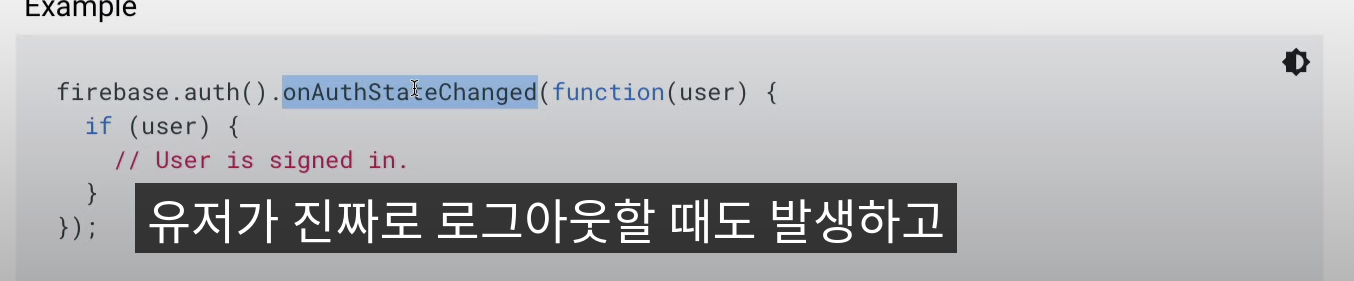|

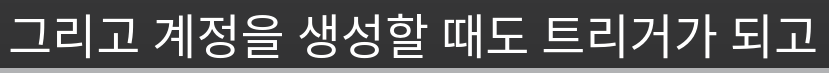

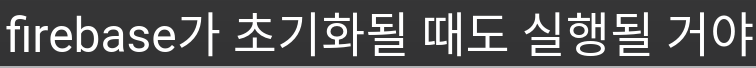

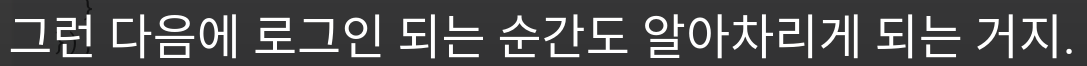

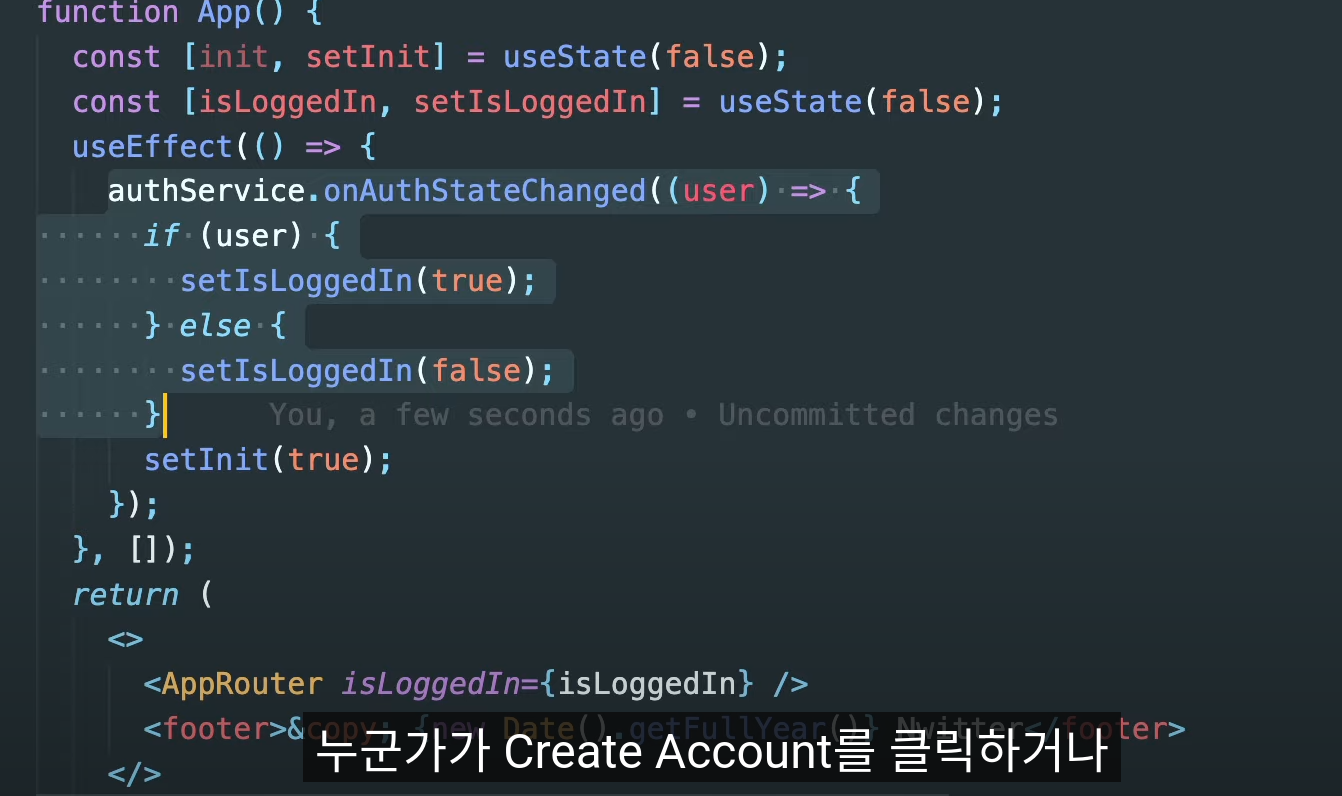

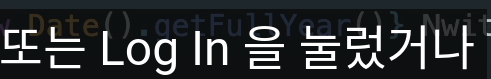

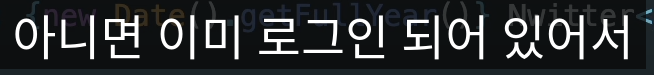

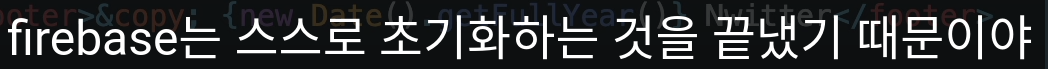

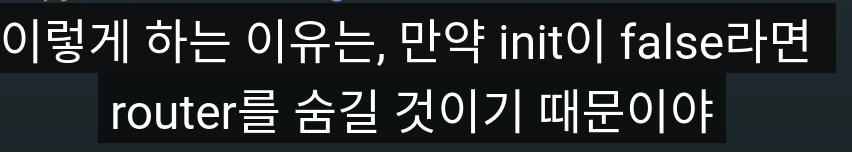

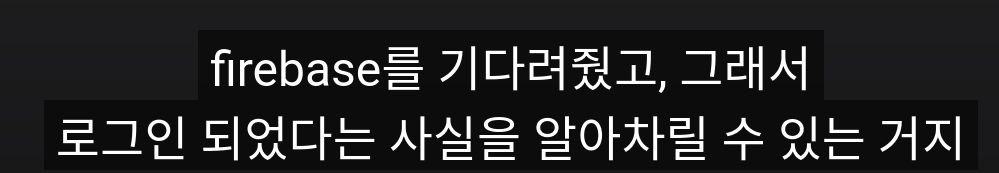

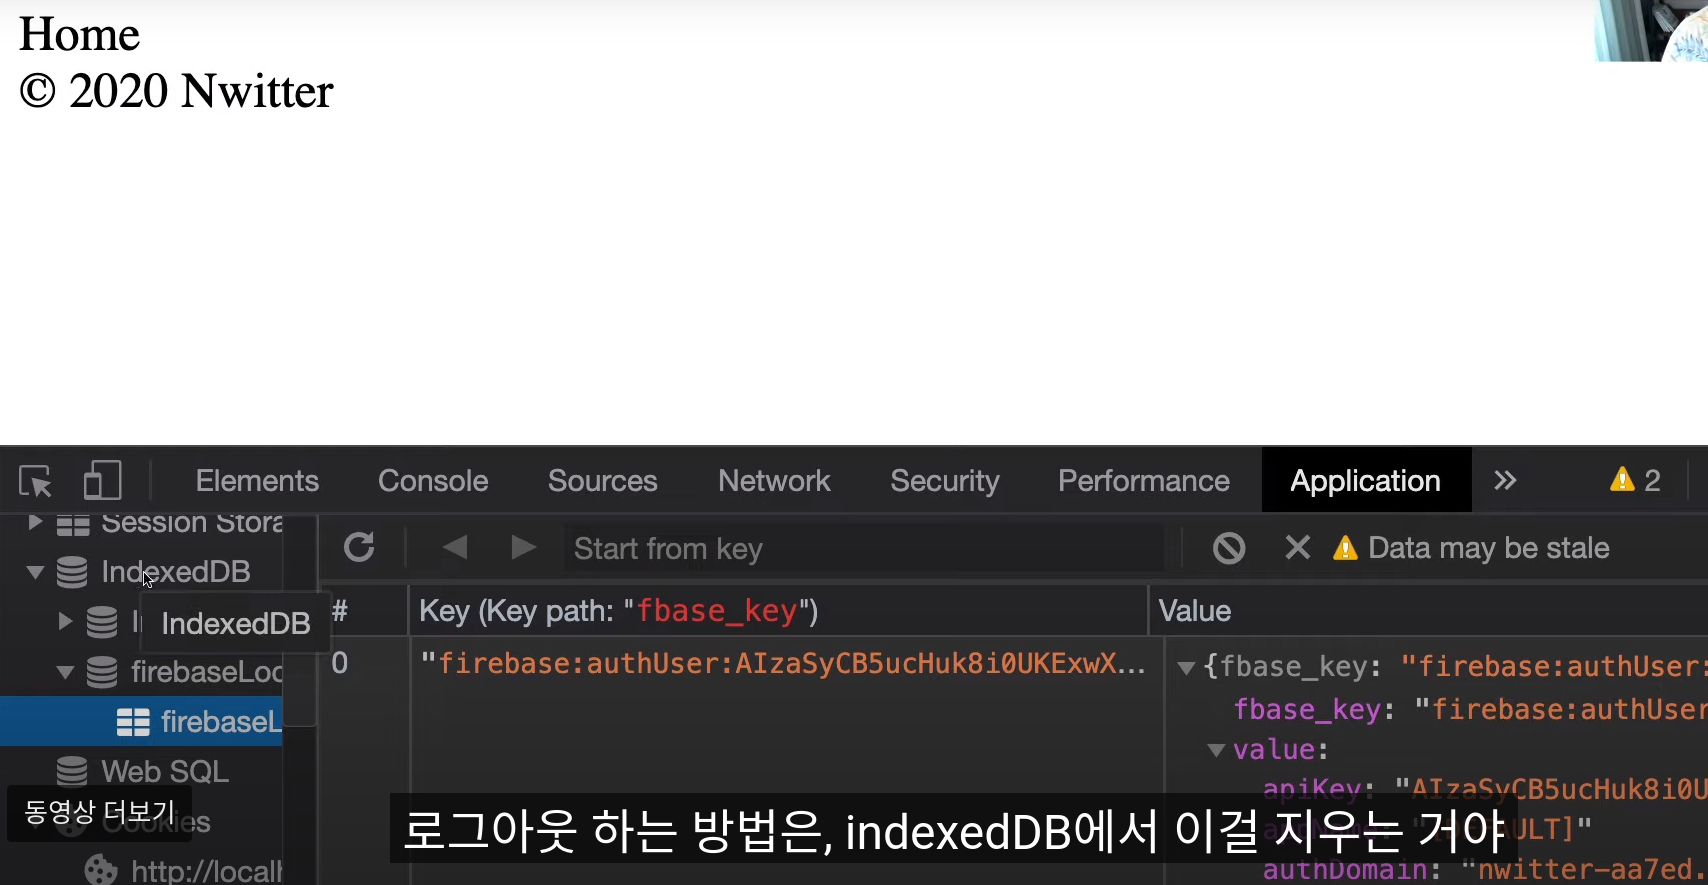

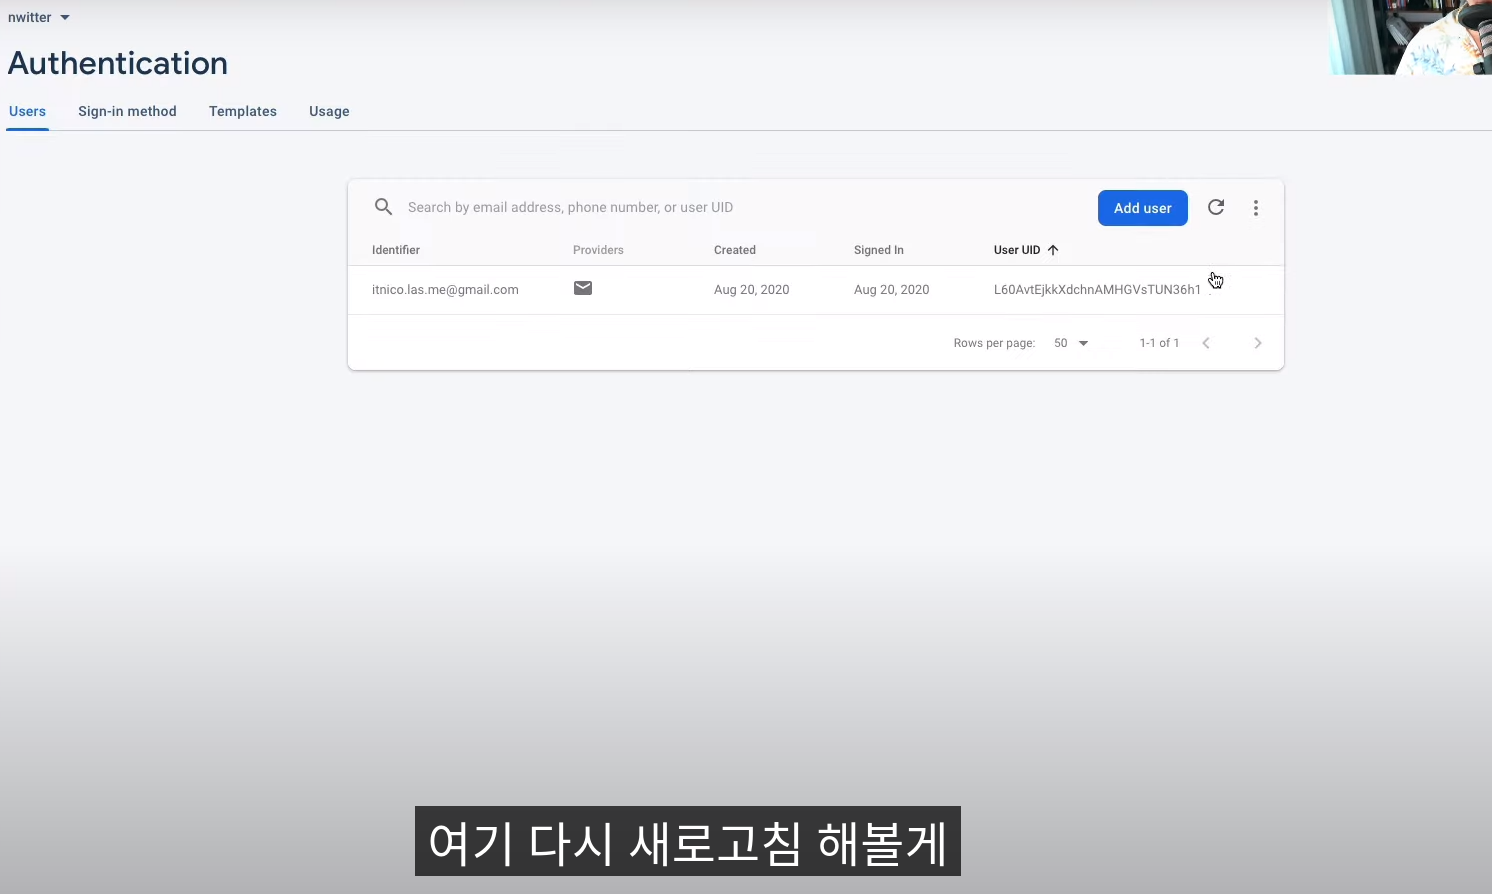

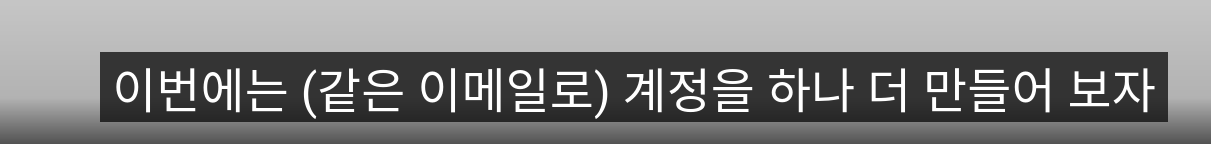

# App.js
```App.js
import { useEffect, useState } from "react";
import AppRouter from "components/Router";
import { authService } from "fbase";
// firebase/auth https://firebase.google.com/docs/reference/js/auth.auth.md#authonauthstatechanged
import { onAuthStateChanged } from "firebase/auth";

function App() {
  const [init, setInit] = useState(false);
  const [isLoggedIn, setIsLoggedIn] = useState(false);
  console.log("APP");
  useEffect(() => {
    onAuthStateChanged(authService, (user) => {
      if (user) {
        console.log(user);
        setIsLoggedIn(true);
      } else {
        setIsLoggedIn(false);
      }
      setInit(true);
    });
  }, []);
  console.log(init);
  console.log(isLoggedIn);
  return (
    <>
      {init ? <AppRouter isLoggedIn={isLoggedIn} /> : "Initializing"}
      <footer>&copy; {new Date().getFullYear()} Jwitter</footer>
    </>
  );
}

export default App;

```

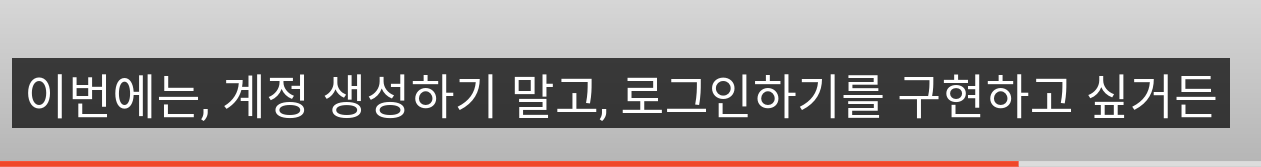

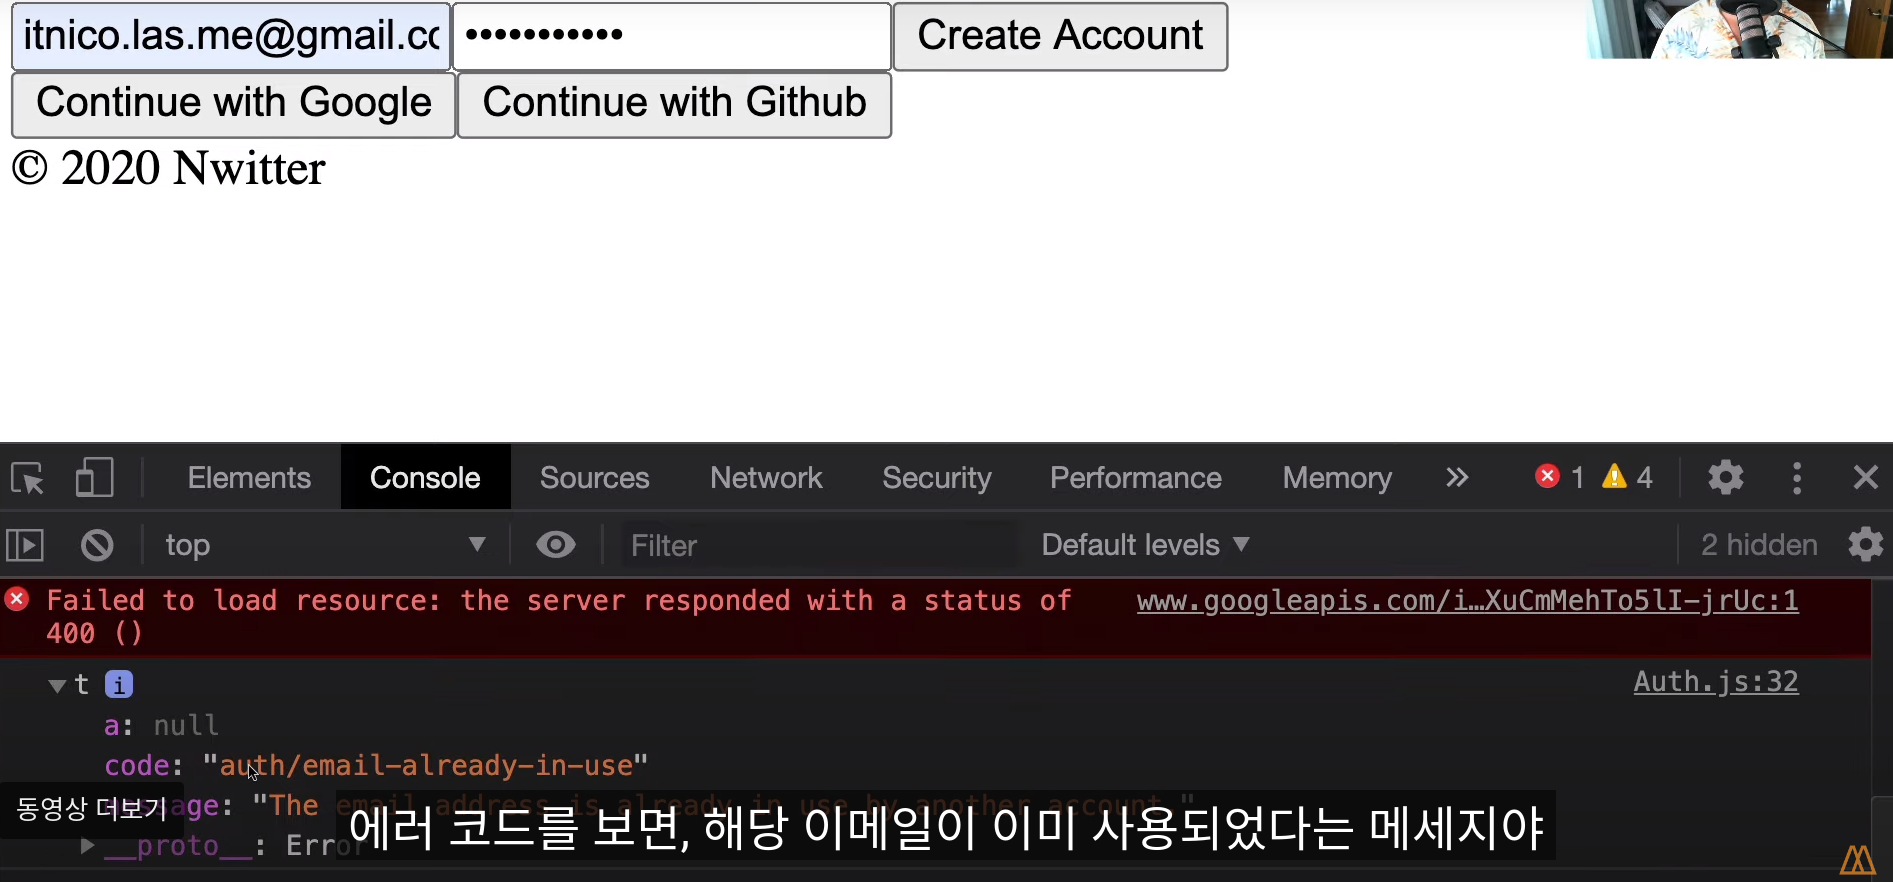

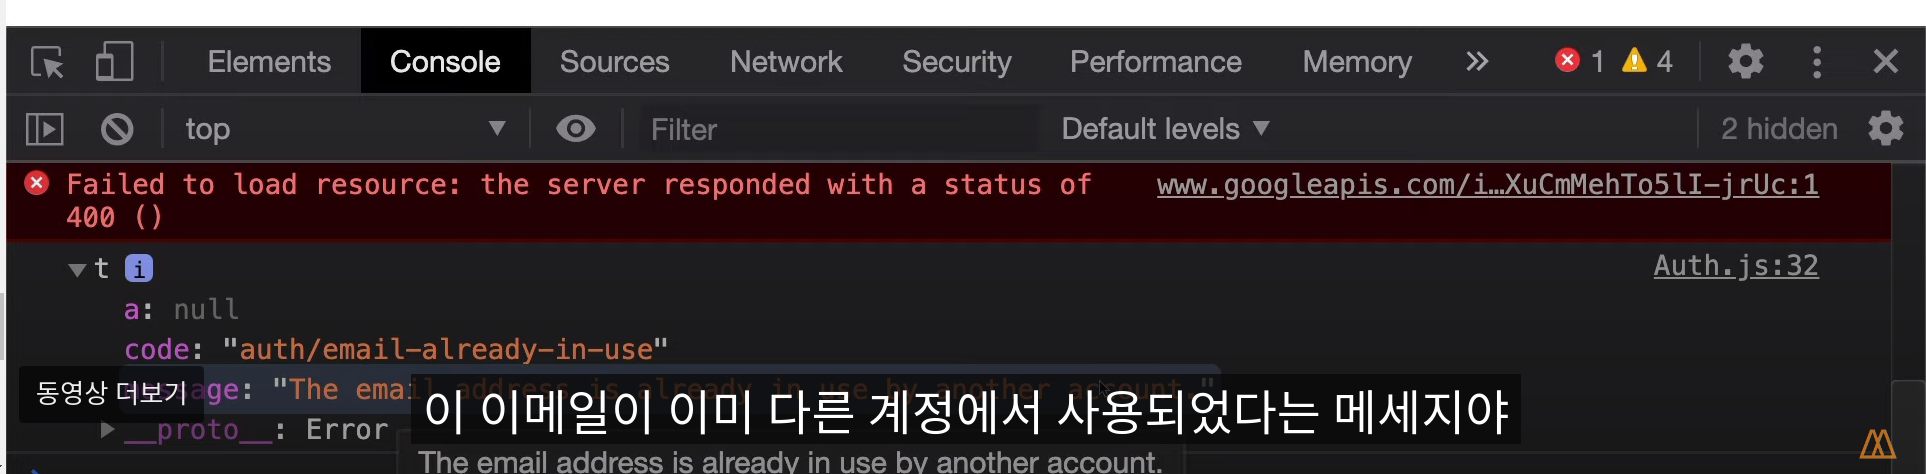

# Auth.js
```Auth.js
import { useState } from "react";
import { authService } from "fbase";

// firebase - Persistence browserSessionPersistence
// https://firebase.google.com/docs/auth/web/auth-state-persistence?authuser=1&hl=ko

// firebase - login signInWithEmailAndPassword, createUserWithEmailAndPassword
// https://firebase.google.com/docs/auth/web/start?hl=ko&authuser=1
import {
  signInWithEmailAndPassword,
  createUserWithEmailAndPassword,
} from "firebase/auth";

function Auth() {
  const [email, setEmail] = useState("");
  const [password, setPassword] = useState("");
  const [newAccount, setNewAccount] = useState(true);
  const [error, setError] = useState("");

  const onChange = (event) => {
    const {
      target: { name, value },
    } = event;
    if (name === "email") {
      setEmail(value);
    } else if (name === "password") {
      setPassword(value);
    }
  };
  const onSubmit = async (event) => {
    event.preventDefault();
    let data;
    try {
      if (newAccount) {
        // create account
        data = await createUserWithEmailAndPassword(
          authService,
          email,
          password
        );
      } else {
        // log in
        data = await signInWithEmailAndPassword(authService, email, password);
      }
      console.log(data);
    } catch (error) {
      console.log(error.message);
      setError(error.message);
    }
  };

  const toggleAccount = () => setNewAccount((prev) => !prev);

  return (
    <>
      <form onSubmit={onSubmit}>
        <input
          name="email"
          type="email"
          placeholder="Email"
          required
          value={email}
          onChange={onChange}
        />
        <input
          name="password"
          type="password"
          placeholder="Password"
          required
          value={password}
          onChange={onChange}
        />
        <input type="submit" value={newAccount ? "Create Account" : "Log In"} />
        {error}
      </form>
      <span onClick={toggleAccount}>
        {newAccount ? "Log in" : "Create Account"}
      </span>
      <div>
        <button>Continue with Google</button>
        <button>Continue with Github</button>
      </div>
    </>
  );
}

export default Auth;

```